# Fitting H$_2$O:Silicate areas in glasses
- This notebook shows how to quantify the relative area of the silicate peak and H$_2$O peak in glasses
- Please see example 4b if you want to quantify H$_2$O/silicate areas in unexposed olivine-hosted melt inclusions

## Import necessary python things

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DiadFit as pf
pf.__version__

'0.0.57'

In [2]:
import os
DayFolder=os.getcwd()
spectra_path=DayFolder
file_ext='.txt'
filetype='headless_txt'

In [3]:
H2O_Files=pf.get_files(path=spectra_path,
file_ext=file_ext, sort=False)
H2O_Files

['ETFS_OL39_MI7_50X_GLASS.txt']

### Select file
-----------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------
- Come back to here and change the i value

In [4]:
print('max i value='+str(len(H2O_Files)-1))

max i value=0


In [5]:
i=0
filename_H2O=H2O_Files[i]
print(filename_H2O)

ETFS_OL39_MI7_50X_GLASS.txt


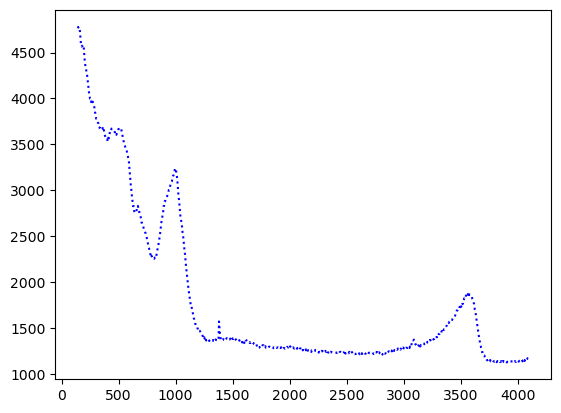

In [6]:
spectra_H2O=pf.get_data(path=spectra_path, filename=filename_H2O,
            Diad_files=None, filetype=filetype)
plt.plot(spectra_H2O[:, 0], spectra_H2O[:,1], ':b')

## Now lets quantify the area under the silicate region

In [7]:
config_silicate=pf.sil_bck_pos_Schiavi_basalt(mid_range2_sil=(770, 810),
     N_poly_sil=4, LW=(400, 600), HW=(800, 1200))
config_silicate

# mid_range2_sil=(790, 800)

sil_bck_pos_Schiavi_basalt(lower_range_sil=(300, 340), mid_range1_sil=(630, 640), mid_range2_sil=(770, 810), upper_range_sil=(1200, 1250), LW=(400, 600), HW=(800, 1200), N_poly_sil=4, sigma_sil=5)

,Silicate_LHS_Back1,Silicate_LHS_Back2,Silicate_RHS_Back1,Silicate_RHS_Back2,Silicate_N_Poly,Silicate_Trapezoid_Area,Silicate_Simpson_Area,LW_Silicate_Trapezoid_Area,LW_Silicate_Simpson_Area,HW_Silicate_Trapezoid_Area,HW_Silicate_Simpson_Area,MW_Silicate_Trapezoid_Area,MW_Silicate_Simpson_Area
0,300,340,1200,1250,4,362558.10011,362562.401959,69943.66401,69904.770625,69943.66401,69904.770625,11333.332933,11342.729097


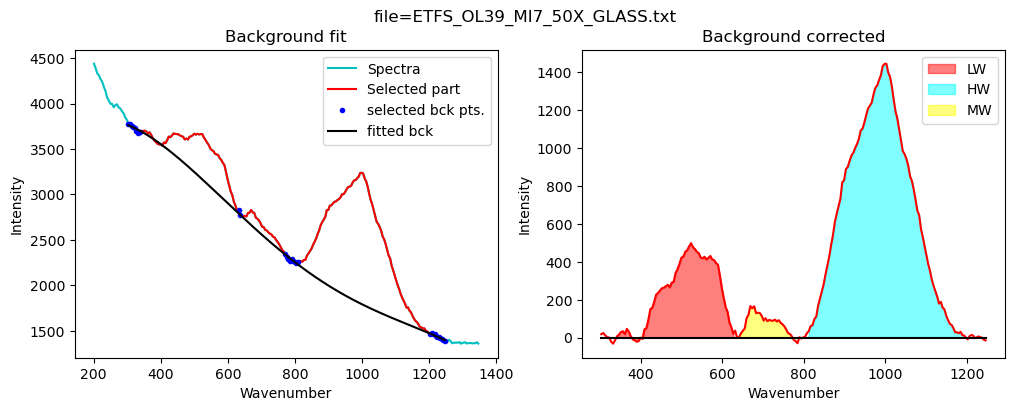

In [8]:
df_sil=pf.fit_area_for_silicate_region(Spectra=spectra_H2O, 
path=spectra_path, filename=filename_H2O, config1=config_silicate,
exclude_range1_sil=None, exclude_range2_sil=None,  plot_figure=True,
fit_sil='poly')
df_sil

## Now quantify the area under the water region

water_bck_pos(fit_water='poly', N_poly_water=3, lower_bck_water=(2500, 2750), upper_bck_water=(3750, 4100))


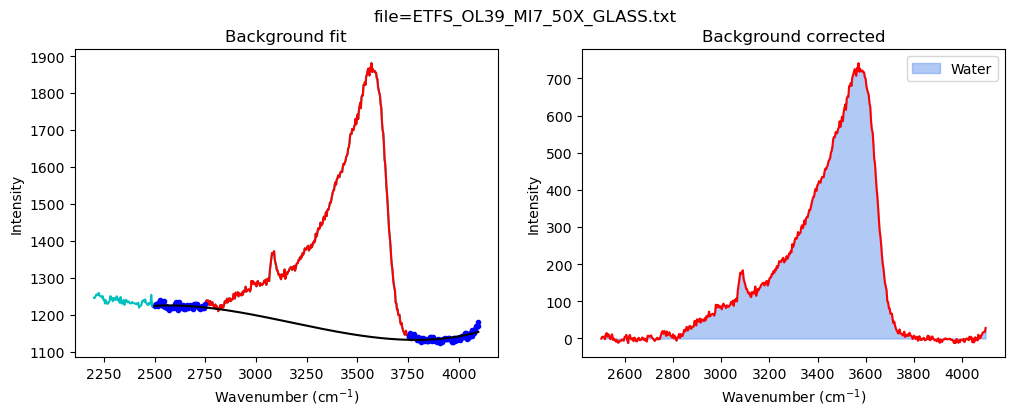

In [9]:
config_H2O=pf.water_bck_pos(lower_bck_water=(2500, 2750))
print(config_H2O)

df_H2O=pf.fit_area_for_water_region(
path=spectra_path, filename=filename_H2O,
Spectra=spectra_H2O,
config1=config_H2O)

In [10]:
combo_out=pf.stitch_dataframes_together(df_sil=df_sil, df_water=df_H2O, 
MI_file=filename_H2O)

In [11]:
combo_out

,MI filename,HW:LW_Trapezoid,HW:LW_Simpson,Water_Trapezoid_Area,Water_Simpson_Area,Silicate_Trapezoid_Area,Silicate_Simpson_Area,Silicate_LHS_Back1,Silicate_LHS_Back2,Silicate_RHS_Back1,...,LW_Silicate_Simpson_Area,HW_Silicate_Trapezoid_Area,HW_Silicate_Simpson_Area,MW_Silicate_Trapezoid_Area,MW_Silicate_Simpson_Area,Water_LHS_Back1,Water_LHS_Back2,Water_RHS_Back1,Water_RHS_Back2,Water_N_Poly
0,ETFS_OL39_MI7_50X_GLASS.txt,3.928982,3.928359,274807.39519,274611.003728,362558.10011,362562.401959,300,340,1200,...,69904.770625,69943.66401,69904.770625,11333.332933,11342.729097,2500,2750,3750,4100,3


### Click this and it will direct you in the TOC on the LHS

[Select file](#Select-file)

### Now go back and loop through as many files as you want, by changing i=...

## Once you've run all your files...
- Now stitch them, this code works by finding Stitching all the files together once you have them

In [12]:
csv_files2=pf.get_files(path=os.getcwd(), ID_str='Ol-H2O',
    sort=True, file_ext='csv')
csv_files2

[]

### Now stitch data from all these CSVs together

In [13]:
df = pd.concat(
    map(pd.read_csv, csv_files2), ignore_index=True)
df

ValueError: No objects to concatenate

### Now save to Excel

In [28]:
df.to_excel('H2O_Silicate_areas.xlsx')